# 04 · Station Analysis

## Objective
While the previous notebooks focused on temporal trip patterns (when people ride), this notebook focuses on the spatial aspect (where people ride). Understanding the geographical distribution of the docking stations is crucial for identifying service gaps, high-demand hubs, and the relationship between infrastructure and usage.
1.  **Geospatial Visualization:** Create a multi-layered map of NYC combining administrative boundaries (boroughs), street infrastructure (centerlines), and docking stations.
2.  **Operational Analysis:** Identify the "Power Users" of the network—the stations with the highest traffic volume.
3.  **Borough Distribution:** Analyze how station density varies across the different districts of New York.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

## Data loading

In [ ]:
PATH = "../data/processed/stations.csv"

df = pd.read_csv(PATH)
nyc_map = gpd.read_file("../data/raw/city/Borough_Boundaries_20260126.geojson")
nyc_streets = gpd.read_file("../data/raw/city/Centerline_20260126.geojson")

print(df.shape)

# Convert stations to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
gdf_stations = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

(2235, 4)


## Geospatial Visualization: The Infrastructure Map

Visualizing coordinates on a blank canvas lacks context. To understand the network density, the stations are overlay on top of the city's actual infrastructure.

**Technical Note on Coordinate Reference Systems (CRS):**
All layers are aligned to **EPSG:4326** (WGS84 - Latitude/Longitude). The street layer is rendered with high transparency (`alpha`) and thin lines to serve as a background texture without cluttering the view.

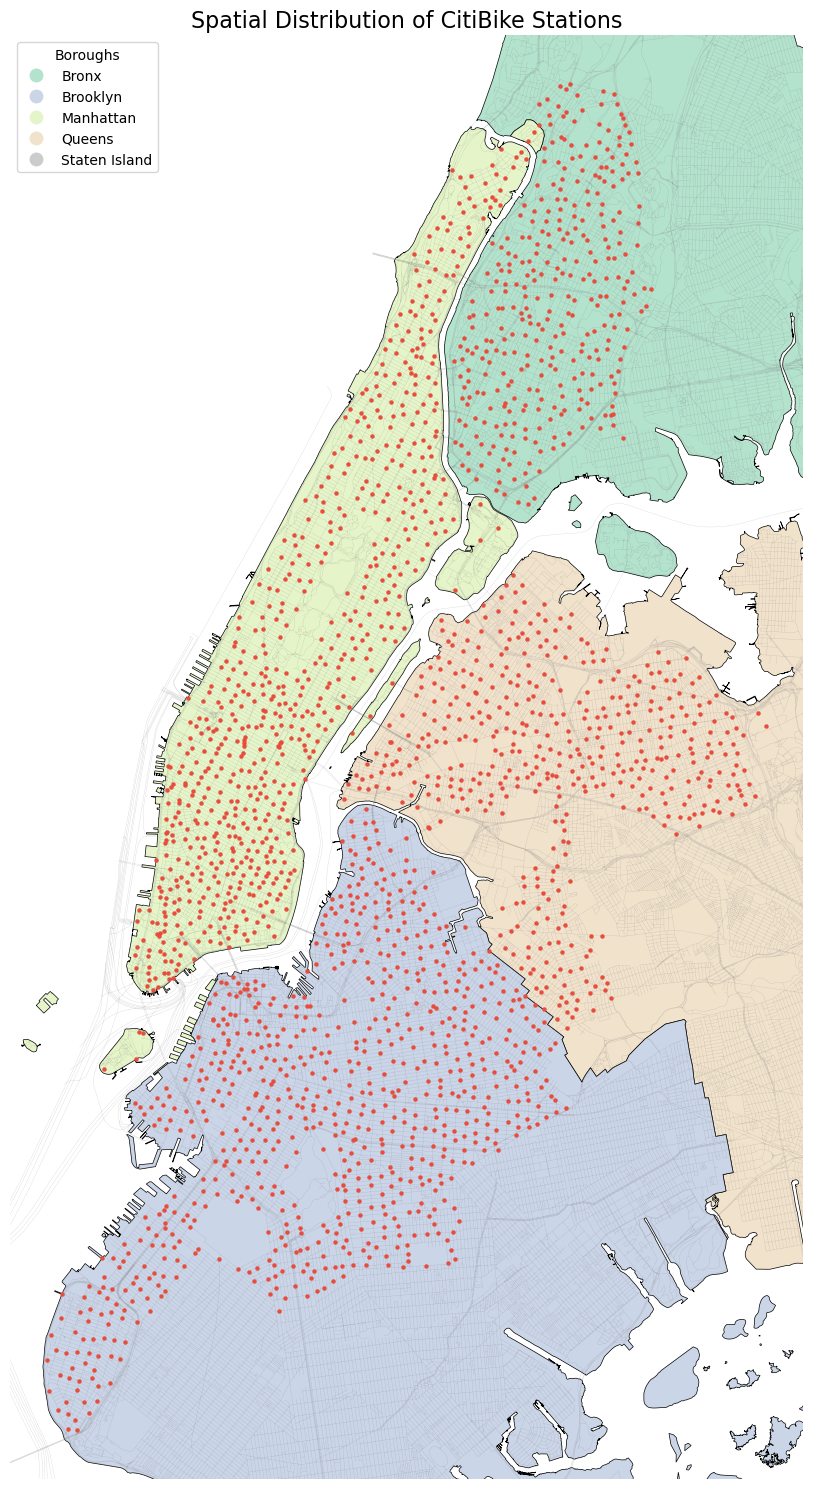

In [13]:
# Ensure all layers speak the same language (EPSG:4326)
target_crs = "EPSG:4326"

if nyc_map.crs != target_crs:
    nyc_map = nyc_map.to_crs(target_crs)
if gdf_stations.crs != target_crs:
    gdf_stations = gdf_stations.to_crs(target_crs)
if nyc_streets.crs != target_crs:
    nyc_streets = nyc_streets.to_crs(target_crs)

fig, ax = plt.subplots(figsize=(15, 15))

nyc_map.plot(
    ax=ax, 
    column='boroname',
    cmap='Pastel2',
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={'loc': 'upper left', 'title': 'Boroughs'}
)

nyc_streets.plot(
    ax=ax, 
    color='gray', 
    linewidth=0.2, 
    alpha=0.4,
    zorder=1
)

gdf_stations.plot(
    ax=ax, 
    markersize=8, 
    color='#e74c3c',
    linewidth=0.3,
    alpha=1,
    label='CitiBike Stations',
    zorder=2 
)

plt.title('Spatial Distribution of CitiBike Stations', fontsize=16)
plt.axis('off')
minx, miny, maxx, maxy = gdf_stations.total_bounds

# Automatic zoom to station area
margin = 0.01 
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)

plt.tight_layout()
plt.show()

The geospatial analysis reveals a significant contrast between physical infrastructure and service availability. While previous analyses confirmed the existence of cycling lanes across all five boroughs, the station map highlights a complete absence of Citi Bike docking stations in Staten Island. Consequently, although the borough possesses the necessary infrastructure for personal cycling, it remains entirely excluded from the shared mobility network.

A distinct pattern of centralization is observed, aligning with the infrastructure density trends analyzed in Notebook 02 (`02_bike_infrastructure_analysis.ipynb`). The highest concentration of docking stations is heavily consolidated within Manhattan. In the surrounding boroughs (Queens, Brooklyn, and the Bronx), station deployment is clustered primarily in neighborhoods adjacent to Manhattan. As a result, the peripheral and outer areas of these boroughs lack access to the service, creating a clear core-periphery divide in coverage.